In [2]:
import warnings
import ipympl
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set_style('darkgrid')
%matplotlib ipympl

%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [7]:
#metadata = pd.read_csv('~/Downloads/DCC_DublinBusGPSSample_P20130415-0916/metadata/siri.20121107.csv', header=0, names=['index', 'sample_rate', 'period', 'duration', 'n_points', 'n_stops', 'n_congestion', 'std_distance', 'distance'])

folder_path = os.path.expanduser('~/Downloads/DCC_DublinBusGPSSample_P20130415-0916/metadata/')

dataframes = []
with os.scandir(folder_path) as it:
    for entry in it:
        if entry.is_file():
            temp_df = pd.read_csv(folder_path + entry.name, header=0, names=['index', 'sample_rate', 'period', 'duration', 'n_points', 'n_stops', 'n_congestion', 'std_distance', 'distance'])
            temp_df['source'] = entry.name
            dataframes.append(temp_df)
            
df = pd.concat(dataframes, ignore_index=True)
len(dataframes)

25

In [8]:
df.head()

index  sample_rate     period  duration  n_points  n_stops  \
0  (1, '331')     0.038117  26.234899      3909       149       20   
1  (2, '331')     0.037951  26.350000      3162       120       28   
2  (3, '331')     0.081633  12.250000        49         4        0   
3   (4, '41')     0.043026  23.241830      3556       153       34   
4   (5, '41')     0.044852  22.295775      3166       142       20   

   n_congestion  std_distance  distance             source  
0             0    112.684184  26096.97  siri.20121113.csv  
1             0    143.325879  23901.45  siri.20121113.csv  
2             0     17.112230    698.12  siri.20121113.csv  
3             0     97.751251  19878.43  siri.20121113.csv  
4             0    102.321292  19578.61  siri.20121113.csv

In [9]:
df.describe()

sample_rate         period       duration       n_points  \
count  251006.000000  251006.000000  251006.000000  251006.000000   
mean        0.034295      58.258561    6007.275862     111.974459   
std         0.033082     299.470262   11346.736572      81.768348   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.024501      23.814117    1016.000000      27.000000   
50%         0.037348      26.569394    3306.000000     115.000000   
75%         0.041771      39.000000    5174.000000     175.000000   
max         1.000000   43176.000000   86398.000000     853.000000   

             n_stops   n_congestion   std_distance      distance  
count  251006.000000  251006.000000  247719.000000  2.510060e+05  
mean       17.727704       0.260014     216.527819  1.762876e+04  
std        20.229430       1.327317     437.904563  3.142360e+04  
min         0.000000       0.000000       0.000000  0.000000e+00  
25%         0.000000       0.000000      69.732281  3.194058e+03  
50%        14.000000       0.000000      95.650125  1.655778e+04  
75%        28.000000       0.000000     144.677437  2.346781e+04  
max       680.000000     364.000000   12911.057722  1.902706e+06

In [13]:
selected = df[(df.n_points > 80) & (df.std_distance <= 60) & (df.duration <= 12000)]
selected.describe()

sample_rate       period      duration     n_points      n_stops  \
count  1574.000000  1574.000000   1574.000000  1574.000000  1574.000000   
mean      0.039039    26.586154   3793.336722   144.191868    24.333545   
std       0.004949     8.927910   1287.536624    38.698880     9.945813   
min       0.006950    20.400000   1820.000000    81.000000     0.000000   
25%       0.037504    23.966025   2799.500000   112.000000    18.000000   
50%       0.039731    25.169376   3819.000000   149.000000    24.000000   
75%       0.041726    26.663923   4397.750000   170.000000    30.000000   
max       0.049020   143.879518  11942.000000   307.000000   103.000000   

       n_congestion  std_distance      distance  
count   1574.000000   1574.000000   1574.000000  
mean       0.620712     55.858547  11905.319956  
std        1.407130      6.119289   3527.574220  
min        0.000000      2.165364    304.030000  
25%        0.000000     54.790392  10009.627500  
50%        0.000000     57.168052  12076.505000  
75%        1.000000     58.686129  14670.350000  
max       17.000000     59.998714  25756.190000

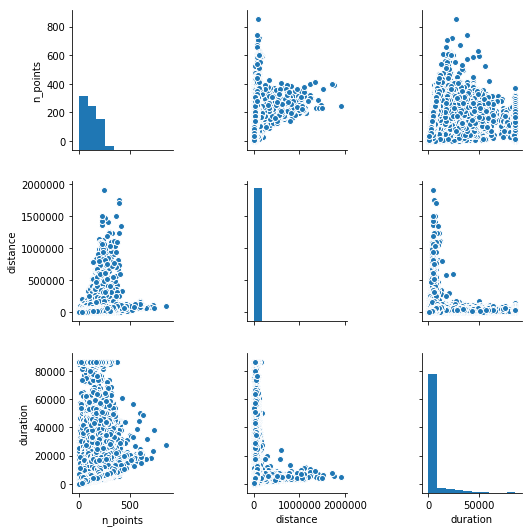

In [12]:
sns.pairplot(df[['n_points', 'distance', 'duration']]);
plt.tight_layout();

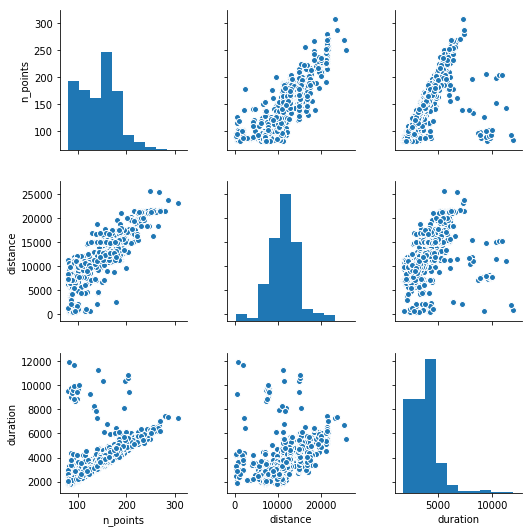

In [14]:
sns.pairplot(selected[['n_points', 'distance', 'duration']]);
plt.tight_layout();

In [28]:
plt.figure()
ax = plt.gca()
ax.set_xlabel('std_distance')
ax.set_ylabel('n_points')
plt.plot(metadata.std_distance, metadata.n_points, 'o');
plt.tight_layout();

FigureCanvasNbAgg()

In [22]:
a = ['1', '2', '3', '1']

In [23]:
a

['1', '2', '3', '1']

In [24]:
a.remove('1')

In [25]:
a

['2', '3', '1']